In [4]:
%matplotlib inline

#LIBRARY IMPORTS AND CONFIGURATIONS
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import theano.tensor as tt
from pymc3.math import logsumexp
from theano.tensor.nlinalg import det


167 datapoints for feature # 1
25 datapoints for feature # 8
k is not 0!


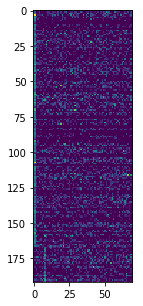

In [5]:
#MAKE SOME FAKE DATA

N = 100 #MEAN NUMBER OF DATAPOINTS

C = 70 #TOTAL NUMBER OF FEATURES (CATEGORIES, FAILURE MECHANISMS)

mean_number_of_failing_features = C * 0.1

K = 2 #NUMBER OF DIFFERENT UNDERLYING FEATURES 
datapoints_for_this_mixture_component = np.zeros(K, dtype=int)
true_feature_columns = np.empty(K,dtype=int)


for k in np.arange(K):
    while datapoints_for_this_mixture_component[k]<=0:
        datapoints_for_this_mixture_component[k] = int(np.random.normal(N, 50))
    true_feature_columns[k] = np.random.randint(0,C)
    
    print("%d datapoints for feature # %d" % (datapoints_for_this_mixture_component[k],true_feature_columns[k]))

    if k==0:
        start=0
        y = np.zeros([datapoints_for_this_mixture_component[k],C])
        number_of_failing_features_this_datapoint = np.zeros(datapoints_for_this_mixture_component[k])
    else:
        print("k is not 0!")
        start=datapoints_for_this_mixture_component[k-1]
        y=np.append(y, np.zeros([datapoints_for_this_mixture_component[k],C]),axis=0)
        number_of_failing_features_this_datapoint = np.append(number_of_failing_features_this_datapoint,np.zeros(datapoints_for_this_mixture_component[k]),axis=0)
        
        
    #FOR EACH DATAPOINT
    for n in range(start,start+datapoints_for_this_mixture_component[k]):
       
        number_of_failing_features_this_datapoint[n] = np.random.randint(0,C)
        
        for ff in np.arange(number_of_failing_features_this_datapoint[n]):
            
            random_failing_feature = np.random.randint(0,C,dtype=int)
            y[n,random_failing_feature]+=np.random.gamma(5, scale=1.0)
            
        y[n,true_feature_columns[k]]+=int(np.random.triangular(0,20,20))


#print(y)
fig = plt.figure(figsize=(5,5))
# Define gridspec
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0])

imgplot = ax1.imshow(y)
#fig.colorbar()
np.savetxt("example_data.csv", y, delimiter=",")

some_arbitrary_noise_columns=np.array([1])

X = y[:,np.concatenate([true_feature_columns,some_arbitrary_noise_columns])]


In [94]:
K = 2. #CLUSTERS

# Log likelihood of normal distribution
def logp_normal(mu, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mu: value - mu
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mu).dot(tau) * delta(mu) + tt.nnet.softmax(mu)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix(mus, pi, tau):
    def logp_(value):
        logps = [tt.log(pi[i]) + logp_normal(mu, tau, value) 
                 for i, mu in enumerate(mus)]

        return tt.sum(logsumexp(tt.stacklists(logps)[:, :n_samples], axis=0))

    return logp_

with pm.Model() as model:
    mus = [pm.MvNormal('mu_%d' % i,
                    mu=pm.floatX(np.zeros(X.shape[1])),
                    tau=pm.floatX(0.1 * np.eye(X.shape[1])),
                    shape=(X.shape[1],))
           for i in range(int(K))]
    pi = pm.Dirichlet('pi', a=pm.floatX(0.1 * np.ones(int(K))), shape=(int(K),))
    xs = pm.DensityDist('x', logp_gmix(mus, pi, np.eye(X.shape[1])), observed=X)

In [76]:
iii, muuu = enumerate(mus)
print(iii)
print(muuu)

(0, mu_0)
(1, mu_1)


In [95]:
with model:
    trace = pm.fit(n=10000, obj_optimizer=pm.adagrad(learning_rate=1e-1))
    #trace = pm.sample(draws=1000, tune=200)

#pm.traceplot(trace, varnames=['p'], lines=dict(p=preal))

Average Loss = 3,937.2: 100%|███████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 766.97it/s]
Finished [100%]: Average Loss = 3,935.4


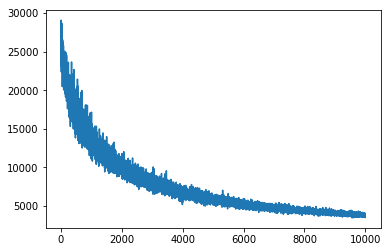

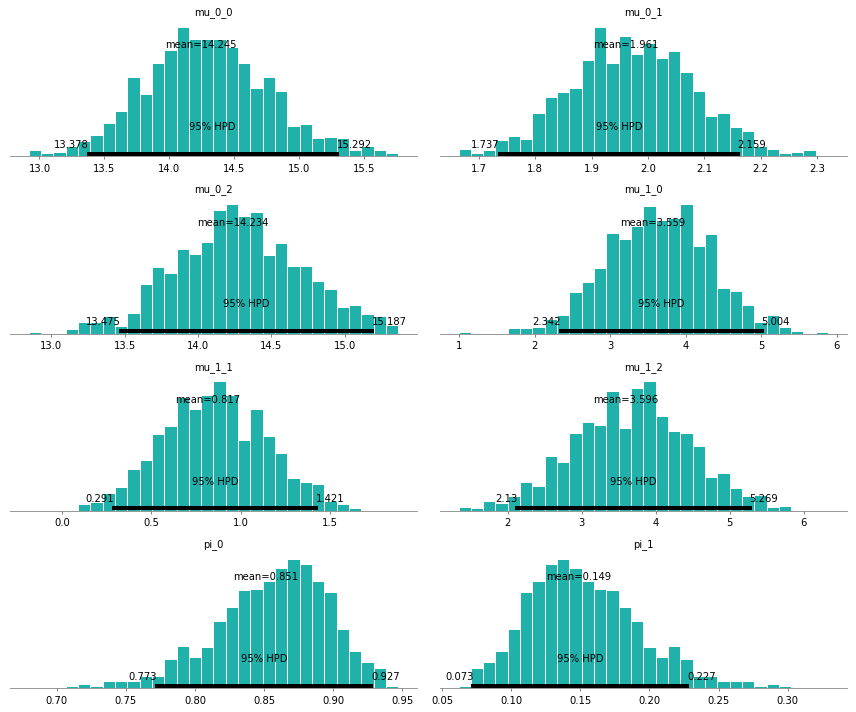

In [96]:
plt.plot(trace.hist)
pm.plot_posterior(trace.sample(1000), color='LightSeaGreen');

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_stickbreaking__]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000036B93898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000036C05710>]], dtype=object)

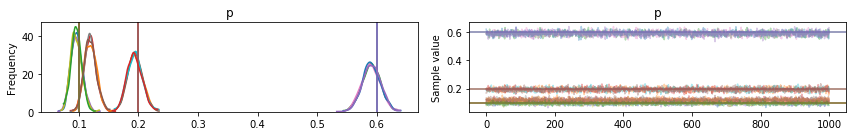

In [3]:
#LETS BUILD A FREAKING MODEL!!!!

preal = [0.1, 0.2, 0.6, 0.1]
y = np.random.choice(4, 1000, p=preal)

with pm.Model():
    
    p = pm.Dirichlet('p', a=np.ones(4))

    pm.Categorical(name='y', p=p, observed=y)

    trace = pm.sample(draws=1000, tune=200)

pm.traceplot(trace, varnames=['p'], lines=dict(p=preal))


In [2]:
#IMPORT THE DATA
df = pd.read_csv('C:/Tmp/LEXA_0_M61G0_07_Diag_2017-07-18_for_pietro.csv')
df = df.fillna(0).head()
data = df.iloc[:,2:].values
print(df.head())
#k=3
#spread = 3
#ndata=500
#centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution
#v = np.random.randint(0, k, ndata)
#data = centers[v] + np.random.randn(ndata)



   DftDefectID  DftCandidateID  Cell.hdan2xss1ulc  Cell.hdao21xss1ul  \
0        30198         2207617           0.000655                0.0   
1        30198         2207618           0.000000                0.0   
2        30198         2207619           0.000000                0.0   
3        30198         2207620           0.000000                0.0   
4        30198         2207621           0.000000                0.0   

   Cell.hdao21xss1urc  Cell.hdao22xss0_5urc  Cell.hdao22xss1ul  \
0                 0.0                   0.0                0.0   
1                 0.0                   0.0                0.0   
2                 0.0                   0.0                0.0   
3                 0.0                   0.0                0.0   
4                 0.0                   0.0                0.0   

   Cell.hdao22xss1urc  Cell.hdao22xss4ul  Cell.hdao32xss1ulc  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0  

In [ ]:
#CONSTRUCT THE MODEL

basic_model = pm.Model()
k = 3
print(data.shape[0])
with basic_model:
    dd = pm.Dirichlet('dd', a=np.ones(data.shape[0]), shape=data.shape[0])
    precs = pm.Gamma('precs', alpha=0.1, beta=0.1, shape=k)
    means = pm.Normal('means', 0, 0.001, shape=k)
    category = pm.Multinomial('category',
                           n=1,
                           p=dd,
                           shape=data.shape[0])

    points = pm.Normal('obs',
                    means[category],
                    precs[category],
                    observed=data)

In [ ]:
basic_model = pm.Model()

#k = 2
number_of_topics = 2
max_candidates_in_corpus = 5
number_of_documents = 100

print data.shape
print float(number_of_topics)
with basic_model:
    dd = pm.Dirichlet('dd', a=np.ones(data.shape[0]), shape=data.shape[0])
    candidate2word = pm.Multinomial('candidate2word', #Categorical IS A Multinomial WITH ONLY 1 DRAW/n
        n=1,
        p=dd,
        #shape=data.shape[0],
        observed=True)
    
    #candidate2word = [Categorical('z_%i' % d, p = theta[d], shape=Wd[d]) for d in range(D)]
    #candidate2word = [Categorical('z_%i' % d, 
    #                              p = theta[d], 
    #                              shape=Wd[d]
    #                              ) for d in range(D) for c in range(C)]
    
    word2topic = pm.Multinomial('word2topic',
        n=1,
        p=dd,
        shape=(data.shape[0])
        )
    document2topic = pm.Multinomial('document2topic',
        n=1,
        p=word2topic,
        shape=[number_of_documents, number_of_topics]
        )
    topic2candidate = pm.Multinomial('topic2candidate',
        n=1,
        p=document2topic,
        shape=data.shape[0])


In [ ]:
help(pm.Multinomial)

In [ ]:
#CONSTRUCT THE MODEL

import theano.tensor as tt
basic_model = pm.Model()
k = 3
ndata = data.shape[1]
with basic_model:
    # cluster sizes
    a = pm.constant(np.ones(k))
    p = pm.Dirichlet('p', a=a, shape=k)
    # ensure all clusters have some points
    p_min_potential = pm.Potential('p_min_potential', tt.switch(tt.min(p) < .000001, -np.inf, 0))


    # cluster centers
    means = pm.Normal('means', mu=np.ones(k), sd=1, shape=k)
    # break symmetry
    order_means_potential = pm.Potential('order_means_potential',
                                         tt.switch(means[1]-means[0] < 0, -np.inf, 0)
                                         + tt.switch(means[2]-means[1] < 0, -np.inf, 0))
    
    # measurement error
    sd = pm.Uniform('sd', lower=0, upper=2)

    # latent cluster of each observation
    category = pm.Categorical('category',
                           p=p,
                           shape=ndata)

    # likelihood for each observed value
    points = pm.Normal('obs',
                     mu=means[category],
                     sd=sd,
                     observed=data)
    
    #points = pm.Container([pm.Categorical("w_%i_%i" % (d,i),
    #                p = pm.Lambda('phi_z_%i_%i' % (d,i), 
    #                          lambda z=z[d][i], phi=phi: phi[z]),
    #                value=data[d][i], 
    #                observed=True)
    #              for d in range(number_of_documents) for i in range(Wd[d])])
    

In [ ]:
# make some step-methods particularly suited to the category stochastic

class RandomScanDiscreteMetropolis(pm.step_methods.arraystep.ArrayStep):
    def __init__(self, var, model=None, values=[0,1]):
        model = pm.modelcontext(model)
        self.values = values
        super(RandomScanDiscreteMetropolis, self).__init__([var], [model.fastlogp])
        
    def astep(self, q0, logp):
        i = np.random.choice(len(q0))

        q = np.copy(q0)
        q[i] = np.random.choice(self.values)
        
        q_new = pm.step_methods.arraystep.metrop_select(logp(q) - logp(q0), q, q0)
        
        return q_new


class SequentialScanDiscreteMetropolis(pm.step_methods.arraystep.ArrayStep):
    def __init__(self, var, model=None, values=[0,1]):
        model = pm.modelcontext(model)
        self.values = values
        self.i = 0
        super(SequentialScanDiscreteMetropolis, self).__init__([var], [model.fastlogp])
        
    def astep(self, q0, logp):

        q = np.copy(q0)
        q[self.i] = np.random.choice(self.values)
        self.i = (self.i + 1) % len(q)
        
        q_new = pm.step_methods.arraystep.metrop_select(logp(q) - logp(q0), q, q0)
        
        return q_new

In [ ]:
from scipy import optimize
with basic_model:
    start = pm.find_MAP(fmin=optimize.fmin)
    
print start

In [ ]:
data[data[:,33]==0,33]=0.0001
print data[:,33]

In [ ]:
#PERORM THE SAMPLING



with basic_model:

    # obtain starting values via MAP
    

    # instantiate sampler
    step = pm.NUTS(scaling=start)
    #step = NUTS()

    # draw 500 posterior samples
    trace = sample(500, step, start=start)

In [ ]:
# fit model
with basic_model:
    step1 = pm.Metropolis(vars=[p])
    step2 = pm.Metropolis(vars=[sd, means])
    step3 = SequentialScanDiscreteMetropolis(var=category, values=[0,1,2])
    tr = pm.sample(10000, step=[step1, step2] + [step3]*ndata)

In [ ]:
#DISPLAY THE RESULTS
pm.traceplot(tr)
pm.summary(tr)

In [23]:

import sys, IPython, scipy, matplotlib, platform
if platform.system() == "Windows":
    distro = ' '.join(platform.win32_ver()[:])
elif platform.system() == "Linux":
    distro = join(platform.linux_distribution()[:2])
print("This notebook was created on a computer %s running %s %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), platform.system(), distro, sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

This notebook was created on a computer AMD64 running Windows 7 6.1.7601 SP1 Multiprocessor Free and using:
Python 3.6.3
IPython 6.1.0
PyMC3 3.2
NumPy 1.13.3
SciPy 0.19.1
Matplotlib 2.1.0
Seaborn 0.8.0

